In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('iris.csv')

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

# Exploring the Data

# Visualizing the data

<IPython.core.display.Javascript object>

C:\Users\Trapti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='count'>

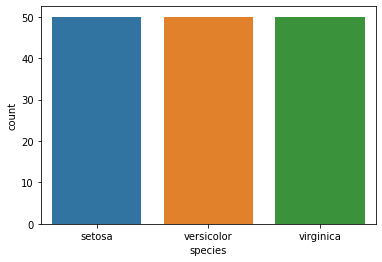

In [8]:
sns.countplot(df['species']) 


In [9]:
df.species = df.species.replace(('setosa','virginica','versicolor'),(0,1,2))

# Correlation between Features

In [15]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.460039
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.612165
petal_length,0.871754,-0.420516,1.000000,0.962757,0.649101
petal_width,0.817954,-0.356544,0.962757,1.000000,0.580749
species,0.460039,-0.612165,0.649101,0.580749,1.000000


<IPython.core.display.Javascript object>

<AxesSubplot:>

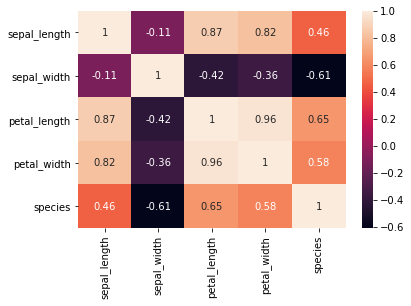

In [14]:
sns.heatmap(df.corr(),annot=True)

In [11]:
X = df.drop('species',axis=1)
y= df.species

In [13]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 150, dtype: int64

# Applying Logistic regression with classification report and confusion matrix


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 1997)

# Importing Classification report & confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score 


In [31]:
from sklearn.linear_model import LogisticRegression 
ls = LogisticRegression().fit(X_train,y_train)

In [32]:
y_pred = ls.predict(X_test) 
cr = classification_report(y_test, y_pred)
print(cr) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.91      1.00      0.95        10
           2       1.00      0.94      0.97        16

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

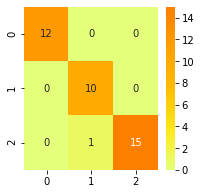

In [33]:
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show() 


# Applying knn classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3).fit(X_train,y_train)

y_pred_knn = kn.predict(X_test) 
cr = classification_report(y_test, y_pred_knn)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.91      1.00      0.95        10
           2       1.00      0.94      0.97        16

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

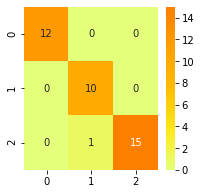

In [37]:
cm = confusion_matrix(y_test, y_pred_knn)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show() 

# Applying SVM 

In [38]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear') 
svc.fit(X,y) 
y_pred_svc = svc.predict(X_test) 
print("Training Accuracy :", svc.score(X_train, y_train)) 

Training Accuracy : 1.0


In [39]:
cr = classification_report(y_test, y_pred_svc)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.91      1.00      0.95        10
           2       1.00      0.94      0.97        16

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



# Creating pkl File

In [40]:
#dumb file
import pickle
filename = 'Iris_ls.pkl'
pickle.dump(ls, open(filename, 'wb'))

In [42]:
#dumb file
import pickle
filename = 'Iris_kn.pkl'
pickle.dump(kn, open(filename, 'wb'))

In [43]:
#dumb file
import pickle
filename = 'Iris_svc.pkl'
pickle.dump(svc, open(filename, 'wb'))

In [44]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [49]:
data = [[5.1,3.5,1.4,0.2]]

In [54]:
ls.predict(data)[0]

0

In [52]:
kn.predict(data)[0]

0

In [53]:
svc.predict(data)[0]

0